# Part1

### Import and analyse the data set.

In [1]:
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore") # To ignore any warnings

import tensorflow as tf
from tensorflow.keras.datasets import imdb # Loading Data
from tensorflow.keras.preprocessing.sequence import pad_sequences # Preprocessing

# Importing the libraries for model building
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, Dropout, Flatten
from tensorflow.keras.backend import clear_session

# Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(tf.__version__)

2.7.0


In [2]:
top_words = 10000
max_len = 500
embedding_size = 32

In [3]:
# Loading the dataset but only keep the top 10000 words, zero the rest
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)

17473536/17464789 [==============================] - 0s 0us/step


In [4]:
# Merging data to create features, labels and DataFrame
X = np.concatenate((X_train, X_test), axis=0) # Features
y = np.concatenate((y_train, y_test), axis=0) #Labels

data_raw = pd.DataFrame({'Review': X, 'Sentiment': y}) #DataFrame
data_raw.sample(5)

,Review,Sentiment
38093,"[1, 283, 50, 26, 49, 9704, 18, 4, 31, 37, 494,...",1
13851,"[1, 13, 264, 15, 325, 108, 144, 353, 8, 2833, ...",0
28116,"[1, 14, 9, 6, 87, 117, 20, 368, 7, 221, 105, 5...",1
49883,"[1, 14, 20, 9, 6, 147, 437, 7, 58, 5, 781, 4, ...",0
24504,"[1, 6445, 4, 2, 5531, 103, 4, 1115, 454, 19, 3...",1


In [5]:
# Summarizing dataset size
print("Total training data shape: ")
print("-" * 30)
print("Features: ", X.shape)
print("Labels: ", y.shape)

Total training data shape: 
------------------------------
Features:  (50000,)
Labels:  (50000,)


In [6]:
# Summarizing number of labels
print("Labels: ", np.unique(y))

Labels:  [0 1]


In [7]:
# Summarizing label count
data_raw['Sentiment'].value_counts()

1    25000
0    25000
Name: Sentiment, dtype: int64

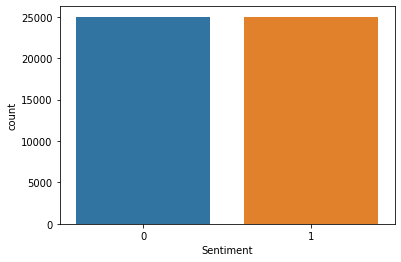

In [8]:
import seaborn as sns
sns.countplot(x='Sentiment',data=data_raw)

**Observation** : Both 0 and 1 Sentiments are equal

### Perform relevant sequence adding on the data

In [9]:
# pad dataset to a maximum review length in words
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

## Perform following data analysis:

### a)Print shape of features and labels
Number of review, number of words in each review

In [10]:
print("Shape of features: ", X.shape)
print("-" * 30)
print("Shape of labels: ", y.shape)

Shape of features:  (50000,)
------------------------------
Shape of labels:  (50000,)


### b)Print value of any one feature and it's label.

In [11]:
print("Label:", y[0])
print("-" * 30)
print("Feature: ")
print(X[0])

Label: 1
------------------------------
Feature: 
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


## Decode the feature value to get original sentence

In [12]:
index = imdb.get_word_index()
reverse_index = dict([(value, key) for (key, value) in index.items()]) 
decoded = " ".join( [reverse_index.get(i - 3, "#") for i in X[0]] )
print(decoded)

1654784/1641221 [==============================] - 0s 0us/step
# this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert # is an amazing actor and now the same being director # father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for # and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also # to the two little boy's that played the # of norman and paul they were just brilliant children are often left out of the # list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amaz

## Design, train, tune and test a sequential model

In [13]:
print("Shape of Training Data: ", X_train.shape)
print('-' * 30)
print("Shape of Testing Data: ", X_test.shape)

Shape of Training Data:  (25000, 500)
------------------------------
Shape of Testing Data:  (25000, 500)



### **Define Model**
- Define a Sequential Model
- Add Embedding layer
- Add Dense Layer with 250 nuerons
- Added Dropout layer
- Added Flatten layer
- Added Dense layer with 150 nuerons
- added Dropout layer
- Added Output layer

### **Compile Model**
- Use Optimizer as Adam
- Use Binary Crossentropy as loss
- Use Accuracy as metrics

### **Summary Model**
- Added model summary

In [14]:
# Base Model Architechture
clear_session()
# Create the model

model = Sequential()
# Input Layer
model.add(Embedding(top_words, embedding_size, input_length=max_len))
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.3, noise_shape=None, seed=None))
model.add(Flatten())
model.add(Dense(150, activation='relu'))
model.add(Dropout(0.3, noise_shape=None, seed=None))
# Output Layer
model.add(Dense(1, activation='sigmoid'))

# Compling Model
adam_opt = tf.keras.optimizers.Adam(lr=0.001)
model.compile(loss='binary_crossentropy', optimizer= adam_opt, metrics=['accuracy'])
#Model Summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 32)           320000    
                                                                 
 dense (Dense)               (None, 500, 250)          8250      
                                                                 
 dropout (Dropout)           (None, 500, 250)          0         
                                                                 
 flatten (Flatten)           (None, 125000)            0         
                                                                 
 dense_1 (Dense)             (None, 150)               18750150  
                                                                 
 dropout_1 (Dropout)         (None, 150)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 1

In [15]:
# Fit the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = 2, batch_size = 128, verbose=2)

Epoch 1/2
196/196 - 171s - loss: 0.5278 - accuracy: 0.6956 - val_loss: 0.2895 - val_accuracy: 0.8781 - 171s/epoch - 870ms/step
Epoch 2/2
196/196 - 164s - loss: 0.2230 - accuracy: 0.9139 - val_loss: 0.2862 - val_accuracy: 0.8809 - 164s/epoch - 838ms/step


In [16]:
# Final evaluation of the model
loss, acc = model.evaluate(X_train, y_train, verbose=0)
print('Train Accuracy: %.3f%%' % (acc*100))
print('Train Loss: %.3f'% loss)
print("-" * 30)

loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.3f%%' % (acc*100))
print('Test Loss: %.3f'% loss)

Train Accuracy: 95.972%
Train Loss: 0.131
------------------------------
Test Accuracy: 88.088%
Test Loss: 0.286


In [17]:
# Predicting for all of test dataset 
predictions = model.predict(X_test)

In [18]:
# Inversing probability into test labels
rounded = [round(x[0]) for x in predictions]
predictions = rounded

Text(0.5, 1.0, 'Accuracy Score: 0.88088')

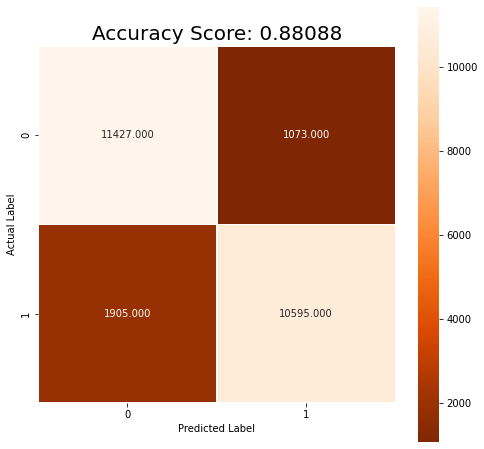

In [19]:
# Confusion Matrix

cm = confusion_matrix(y_test,predictions)
plt.figure(figsize=(8,8))
sns.heatmap(cm, annot = True, fmt = '.3f', linewidths = .5, square = True, cmap="Oranges_r")
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(y_test,predictions))
plt.title(all_sample_title, size = 20)

**Observations**:-
1. About 1905 labels are wrongly classified in 0.
2. About 1073 labels are wrongly classified in 1.

In [20]:
# Classification Report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88     12500
           1       0.91      0.85      0.88     12500

    accuracy                           0.88     25000
   macro avg       0.88      0.88      0.88     25000
weighted avg       0.88      0.88      0.88     25000



**Inference**:- f1-score for 0's and 1's are same. Also macro avg f1-score is same to accuracy and weighted avg f1-score.

In [21]:
# Plotting History
def plot_history(history):
    # Storing Accuracies and Losses data of Training and Validation
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)
    # Features settings for plot
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.xlabel('Epoch ==>')
    plt.ylabel('Accuracy (%) ==>')
    plt.plot(x, acc, 'c', label='Training acc')
    plt.plot(x, val_acc, 'm', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.xlabel('Epoch ==>')
    plt.ylabel('Loss ==>')
    plt.plot(x, loss, 'c', label='Training loss')
    plt.plot(x, val_loss, 'm', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
  

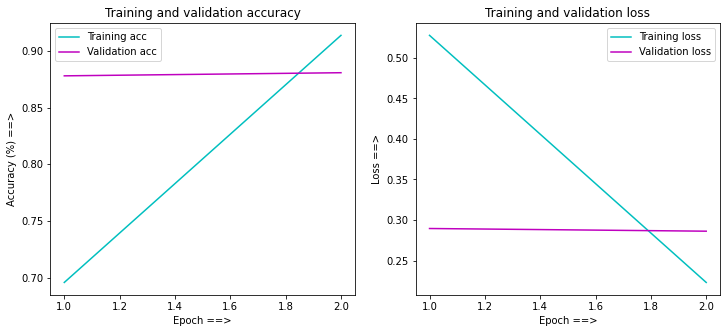

In [22]:
  plot_history(history)

**Observations**:- From the above plot it can be concluded that this model has low learning rate and has a little problem of overfitting.

## Use the designed model to print the prediction on any one sample.

In [23]:
# Creating word dictionary for comparing with the random input sample
word_dict = imdb.get_word_index()
word_dict = { key:(value + 3) for key, value in word_dict.items() }
word_dict[''] = 0  # Padding
word_dict['>'] = 1 # Start
word_dict['?'] = 2 # Unknown word
reverse_word_dict = { value:key for key, value in word_dict.items() }

In [24]:
def predict_on_sample(text):
    # Preparing the input by removing punctuation characters, converting characters to lower case, and removing words containing numbers
    translator = str.maketrans('', '', string.punctuation)
    text = text.translate(translator)
    text = text.lower().split(' ')
    text = [word for word in text if word.isalpha()]

    # Generating an input tensor
    input = [1]
    for word in text:
        if word in word_dict and word_dict[word] < top_words:
            input.append(word_dict[word])
        else:
            input.append(2)
    padded_input = pad_sequences([input], maxlen=max_len)

    # Predicting on sample using the model and returning the result
    result = model.predict(np.array([padded_input][0]))[0][0]

    # Checking the result for Positive or Negative Prediction
    predicted_sentiment = ""
    if round(result) == 1:
      predicted_sentiment = "Predicted Sentiment is Positive"
    else:
      predicted_sentiment = "Predicted Sentiment is Negative" 

    return result, predicted_sentiment

In [25]:
# Passing a random positive movie review of from google for prediction
result, predicted_sentiment = predict_on_sample("Satyameva Jayate 2 is a power packed mass entertainer with a good performance from John Abraham.")
print("Predicted Probability : ", result)
print("-" * 30)
print(predicted_sentiment)

Predicted Probability :  0.7793937
------------------------------
Predicted Sentiment is Positive


In [26]:
# Passing a random negative movie review from google for prediction
result, predicted_sentiment = predict_on_sample("I can't think of a folk hero in human history with fewer redeeming qualities than James Bond. He's not even a human being, but just a department store dummy going bang-bang… Of course, this reviewer is too wise in the ways of brainwashing to believe that any of his readers will believe him. So see it for yourself, but don't blame me.")
print("Predicted Probability : ", result)
print("-" * 30)
print(predicted_sentiment)

Predicted Probability :  0.20386097
------------------------------
Predicted Sentiment is Negative


**Conclusion**:- The model is predicting very good on the random sample taken from google

# PART2

In [27]:
from google.colab import drive  
drive.mount('/content/drive/',force_remount=True)

Mounted at /content/drive/


In [28]:
#Importing all the necessary libraries
import os
import string
import regex as re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore") # To ignore any warnings

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report # Performance Metrics

from wordcloud import WordCloud # To display WordCloud
import tensorflow as tf


In [29]:
import os
cwd_old = os.getcwd()
print('\nWorking directory: ', cwd_old)

os.chdir('/content/drive/MyDrive/AIML/projects/NLP/Project2/')
print('Working directory has changed')

# verifying the current directory has changed
cwd_new = os.getcwd()
print('\nCurrent Working directory: ', cwd_new)


Working directory:  /content
Working directory has changed

Current Working directory:  /content/drive/MyDrive/AIML/projects/NLP/Project2


### Load data

In [30]:
data = pd.read_json('/content/drive/MyDrive/AIML/projects/NLP/Project2/Sarcasm_Headlines_Dataset.json', lines = True)
print(f'Data has {data.shape[0]} rows and {data.shape[1]} columns. The first five headlines in the dataset along with their category are:')
display(data.head())

Data has 28619 rows and 3 columns. The first five headlines in the dataset along with their category are:


,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28619 entries, 0 to 28618
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   is_sarcastic  28619 non-null  int64 
 1   headline      28619 non-null  object
 2   article_link  28619 non-null  object
dtypes: int64(1), object(2)
memory usage: 670.9+ KB


In [32]:
import seaborn as sns
# Summarizing label count
data['is_sarcastic'].value_counts()


0    14985
1    13634
Name: is_sarcastic, dtype: int64

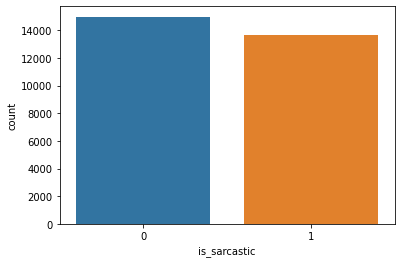

In [33]:
sns.countplot(x='is_sarcastic',data=data)

### **Observations**:- Unsarcastic data is slightly more than sarcastic one's but overall the dataset is balanced.

## Retain relevant columns

In [34]:
#Drop article_link from dataset
data.drop('article_link', axis = 1, inplace = True)
data.head()

,is_sarcastic,headline
0,1,thirtysomething scientists unveil doomsday clo...
1,0,dem rep. totally nails why congress is falling...
2,0,eat your veggies: 9 deliciously different recipes
3,1,inclement weather prevents liar from getting t...
4,1,mother comes pretty close to using word 'strea...


### Data Preprocessing

In [35]:
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn
from nltk.corpus import stopwords
from wordcloud import WordCloud
nltk.download('averaged_perceptron_tagger')


substitute = {"ain't": "am not", "aren't": "are not", "can't": "cannot", "can't've": "cannot have",
              "'cause": "because", "could've": "could have", "couldn't": "could not", "couldn't've": "could not have",
              "didn't": "did not", "doesn't": "does not", "don't": "do not", "hadn't": "had not", 
              "hadn't've": "had not have", "hasn't": "has not", "haven't": "have not", "he'd": "he would",
              "he'd've": "he would have", "he'll": "he will", "he'll've": "he will have", "he's": "he is",
              "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is", 
              "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have",
              "I'm": "I am", "I've": "I have", "isn't": "is not", "it'd": "it would",
              "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have", "it's": "it is",
              "let's": "let us", "ma'am": "madam", "mayn't": "may not", "might've": "might have",
              "mightn't": "might not", "mightn't've": "might not have", "must've": "must have", "mustn't": "must not",
              "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have", "o'clock": "of the clock",
              "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not",
              "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", "she'll": "she will",
              "she'll've": "she will have", "she's": "she is", "should've": "should have", "shouldn't": "should not",
              "shouldn't've": "should not have", "so've": "so have", "so's": "so is", "that'd": "that had",
              "that'd've": "that would have", "that's": "that that is", "there'd": "there would", "there'd've": "there would have",
              "there's": "there is", "they'd": "they would", "they'd've": "they would have", "they'll": "they will",
              "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
              "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will",
              "we'll've": "we will have", "we're": "we are", "we've": "we have", "weren't": "were not", 
              "what'll": "what will", "what'll've": "what will have", "what're": "what are", "what's": "what is",
              "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did",
              "where's": "where is", "where've": "where have", "who'll": "who will", "who'll've": "who will have", 
              "who's": "who is", "who've": "who have", "why's": "why is", "why've": "why have",
              "will've": "will have", "won't": "will not", "won't've": "will not have", "would've": "would have",
              "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would",
              "y'all'd've": "you all would have", "y'all're": "you all are", "y'all've": "you all have", "you'd": "you would",
              "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", "you're": "you are",
              "you've": "you have"}

# Function to replace substitute
def replace_words(headline):
    cleaned_headlines = []
    for word in str(headline).split():
        if word.lower() in substitute.keys():
            cleaned_headlines.append(substitute[word.lower()])
        else:
            cleaned_headlines.append(word)
    return ' '.join(cleaned_headlines)

# Function to remove punctuations
punct = '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~' 
def remove_punctuation(text):
    """function to remove the punctuation"""
    return text.translate(str.maketrans('', '', punct))

# Function to lemmatize
lemmatizer = WordNetLemmatizer()
def lemmatize(text):
  return ''.join([lemmatizer.lemmatize(word) for word in text])

# Function to remove stopwords
stoplist = set(stopwords.words('english'))
stoplist.remove('not')
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stoplist])

# Second function for lemmatizing
lemmatizer = WordNetLemmatizer()
def lem(text):
    pos_dict = {'N': wn.NOUN, 'V': wn.VERB, 'J': wn.ADJ, 'R': wn.ADV}
    return(' '.join([lemmatizer.lemmatize(w,pos_dict.get(t, wn.NOUN)) for w,t in nltk.pos_tag(text.split())]))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [36]:
## Converting headlines to lower case
data['cleaned_headline'] = data['headline'].apply(lambda x : x.lower())

## Replacing apostrophes to the standard lexicons
data['cleaned_headline'] = data['cleaned_headline'].apply(lambda x : replace_words(x))

## Removing punctuations
data['cleaned_headline'] = data['cleaned_headline'].apply(lambda x: remove_punctuation(x))

## Applying Lemmatizer
data['cleaned_headline'] = data['cleaned_headline'].apply(lambda x: lem(x))

## Removing multiple spaces between words
data['cleaned_headline'] = data['cleaned_headline'].apply(lambda x: re.sub(' +', ' ', x))

In [37]:
print('After preprocessing the dataset turns out to be as')
data.head()

After preprocessing the dataset turns out to be as


,is_sarcastic,headline,cleaned_headline
0,1,thirtysomething scientists unveil doomsday clo...,thirtysomething scientist unveil doomsday cloc...
1,0,dem rep. totally nails why congress is falling...,dem rep totally nail why congress is falling s...
2,0,eat your veggies: 9 deliciously different recipes,eat your veggie 9 deliciously different recipe
3,1,inclement weather prevents liar from getting t...,inclement weather prevents liar from getting t...
4,1,mother comes pretty close to using word 'strea...,mother come pretty close to using word streami...


In [38]:
def plot_wordcloud(text, mask = None, max_words = 500, max_font_size = 40, figure_size = (12,6), title = None, title_size = 15):
  wordcloud = WordCloud(background_color = 'white', max_words = max_words, random_state = 42, width = 350, height = 150,
                        mask = mask, stopwords = stoplist, collocations = False)
  wordcloud.generate(str(text))
  
  plt.figure(figsize = figure_size)
  plt.imshow(wordcloud, interpolation = 'bilinear')
  plt.title(title, fontdict = {'size': title_size, 'color': 'black', 'verticalalignment': 'bottom'})
  plt.axis('off')
  plt.tight_layout()

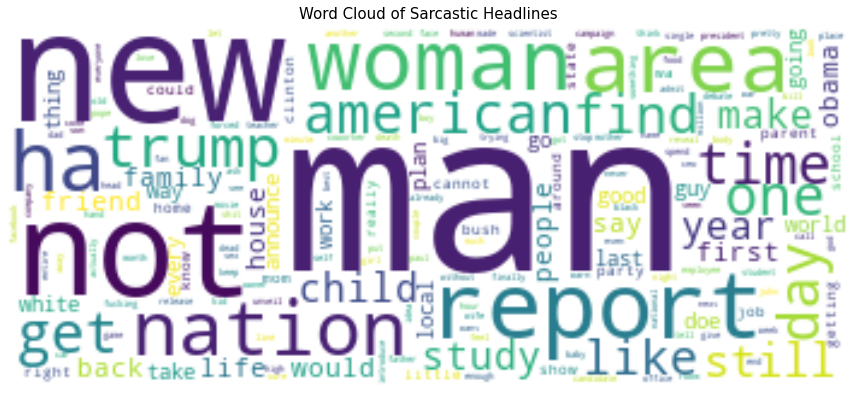

In [39]:
data['headline'] = data['headline'].fillna('')
sarcastic_headline = ' '.join(data.loc[data['is_sarcastic'] == 1, 'cleaned_headline'])
plot_wordcloud(sarcastic_headline, title = 'Word Cloud of Sarcastic Headlines')

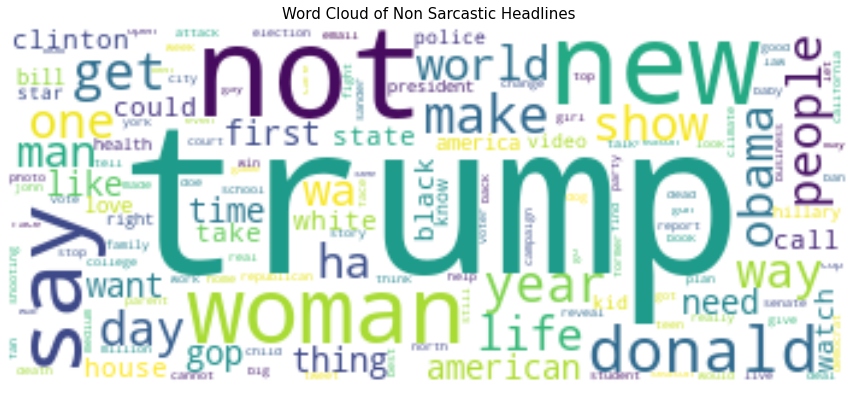

In [40]:
non_sarcastic_headline = ' '.join(data.loc[data['is_sarcastic'] == 0, 'cleaned_headline'])
plot_wordcloud(non_sarcastic_headline, title = 'Word Cloud of Non Sarcastic Headlines')

### Get length of each sentence and add a column for that

In [41]:
# Get number of words in each cleaned_headline and add it as a column
data['num_words'] = data['cleaned_headline'].apply(lambda x: len(x.split()))
data.head()

,is_sarcastic,headline,cleaned_headline,num_words
0,1,thirtysomething scientists unveil doomsday clo...,thirtysomething scientist unveil doomsday cloc...,8
1,0,dem rep. totally nails why congress is falling...,dem rep totally nail why congress is falling s...,13
2,0,eat your veggies: 9 deliciously different recipes,eat your veggie 9 deliciously different recipe,7
3,1,inclement weather prevents liar from getting t...,inclement weather prevents liar from getting t...,8
4,1,mother comes pretty close to using word 'strea...,mother come pretty close to using word streami...,9


### Define parameters

In [42]:
# Hyperparameters
vocab_size = 30000
oov_token = '<00V>'
max_length = 100
padding_type = 'post'
trunc_type = 'post'
embedding_dim = 50
batch_size = 256
num_epochs = 15

### Get indices for words

In [43]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=vocab_size, oov_token=oov_token)
tokenizer.fit_on_texts(data['cleaned_headline'])
word_index = tokenizer.word_index

X = tokenizer.texts_to_sequences(data['cleaned_headline'])

print("Indices for words:- ", word_index)
print('-' * 25)
print("Tokenized samples: ")
print('-' * 25)
print(X[0])

Indices for words:-  {'<00V>': 1, 'to': 2, 'of': 3, 'the': 4, 'in': 5, 'a': 6, 'for': 7, 'on': 8, 'is': 9, 'and': 10, 'with': 11, 'trump': 12, 'not': 13, 'new': 14, 'man': 15, 'it': 16, 'from': 17, 'at': 18, 'you': 19, 'about': 20, 'by': 21, 'after': 22, 'this': 23, 'that': 24, 'woman': 25, 'he': 26, 'be': 27, 'out': 28, 'are': 29, 'how': 30, 'up': 31, 'will': 32, 'what': 33, 'say': 34, 'who': 35, 'report': 36, 'his': 37, 'just': 38, 'your': 39, 'ha': 40, 'u': 41, 'get': 42, 'have': 43, 'all': 44, 'more': 45, 'into': 46, 'one': 47, 'day': 48, 'time': 49, 'make': 50, 'american': 51, 'over': 52, 'why': 53, 'year': 54, 'area': 55, 'can': 56, 'donald': 57, 'like': 58, 'do': 59, 'life': 60, 'no': 61, 'first': 62, 'people': 63, 'her': 64, 'nation': 65, 'way': 66, 'house': 67, 'now': 68, 'world': 69, 'they': 70, 'an': 71, 'we': 72, 'i': 73, 'off': 74, 'thing': 75, 'show': 76, 'white': 77, 'wa': 78, 'still': 79, 'find': 80, 'obama': 81, 'back': 82, 'take': 83, 'family': 84, 'would': 85, 'than'

In [44]:
X = tf.keras.preprocessing.sequence.pad_sequences(X, maxlen=max_length, padding=padding_type, truncating=trunc_type)

print('-' * 25)
print("Padded sample: ")
print('-' * 25)
print(X[0])

-------------------------
Padded sample: 
-------------------------
[13687   327  2959  5782  2068     3   693  1094     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0]


### Create features and labels

In [45]:
print("No. of Features: ", len(X))
print('-' * 25)
print(X[0])

y = np.asarray(data['is_sarcastic'])

print("Number of Labels: ", len(y))
print('-' * 25)
print(y[0])

No. of Features:  28619
-------------------------
[13687   327  2959  5782  2068     3   693  1094     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0]
Number of Labels:  28619
-------------------------
1


### Get vocabulary size

In [46]:
# Vocabulary Size
num_words = len(tokenizer.word_index) + 1
print(" Total no. of words in tokenizer: ", num_words)

 Total no. of words in tokenizer:  26043


### Create a weight matrix using GloVe embeddings

In [47]:
embeddings = {}
for g in open('DataSet - glove.6B.50d.txt'):
  word = g.split(" ")[0]
  embd = g.split(" ")[1:]
  embd = np.asarray(embd, dtype=np.float32)
  embeddings[word] = embd

In [48]:
print("Length of embeddings: ", len(embeddings.values()))

Length of embeddings:  400000


In [49]:
embedding_matrix = np.zeros((num_words, embedding_dim))
for word, i in tokenizer.word_index.items():
  embedding_vector = embeddings.get(word)
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector

In [50]:
print("Shape of embedding matrix : ", embedding_matrix.shape)

Shape of embedding matrix :  (26043, 50)


In [51]:
print("Embedding Matrix sample: ")
embedding_matrix[5]

Embedding Matrix sample: 


array([ 0.33041999,  0.24995001, -0.60873997,  0.10923   ,  0.036372  ,
        0.15099999, -0.55083001, -0.074239  , -0.092307  , -0.32821   ,
        0.09598   , -0.82269001, -0.36717001, -0.67009002,  0.42908999,
        0.016496  , -0.23573001,  0.12864   , -1.09529996,  0.43334001,
        0.57067001, -0.1036    ,  0.20422   ,  0.078308  , -0.42794999,
       -1.79840004, -0.27864999,  0.11954   , -0.12689   ,  0.031744  ,
        3.86310005, -0.17786001, -0.082434  , -0.62698001,  0.26497   ,
       -0.057185  , -0.073521  ,  0.46103001,  0.30862001,  0.12498   ,
       -0.48609   , -0.0080272 ,  0.031184  , -0.36576   , -0.42699   ,
        0.42164001, -0.11666   , -0.50703001, -0.027273  , -0.53285003])

### Define and compile a Bidirectional LSTM model

In [52]:
y = y.reshape(-1,1)

In [53]:
# Train - Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle = True, random_state = 10, test_size = 0.3, stratify = y)

In [54]:
# Randomly shuffle the training data
X_train, y_train = shuffle(X_train, y_train)

In [55]:
print("Shape of Training Data: ", X_train.shape)
print('-' * 30)
print("Shape of Testing Data: ", X_test.shape)

Shape of Training Data:  (20033, 100)
------------------------------
Shape of Testing Data:  (8586, 100)


In [56]:
# Base Model Architechture
tf.keras.backend.clear_session() # Clear previous session
base_model = tf.keras.models.Sequential() # Model instantiation
base_model.add(tf.keras.layers.Embedding(num_words, embedding_dim, weights = [embedding_matrix], input_length=max_length)) #Input Layer
base_model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True))) # Bidirectional LSTM Layer
base_model.add(tf.keras.layers.GlobalAveragePooling1D())
base_model.add(tf.keras.layers.Dense(32, activation='relu'))
base_model.add(tf.keras.layers.Dense(1, activation='sigmoid')) # Output Layer

In [57]:
# Compiling the model
base_model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
# Model Summary
base_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 50)           1302150   
                                                                 
 bidirectional (Bidirectiona  (None, 100, 128)         58880     
 l)                                                              
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 32)                4128      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,365,191
Trainable params: 1,365,191
Non-

### Fit the model and check the validation accuracy

In [58]:
mc = tf.keras.callbacks.ModelCheckpoint('base_model_best.hdf5', monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
es = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", mode="max", patience=5)

In [59]:
base_history = base_model.fit(X_train, y_train, batch_size = batch_size, epochs = num_epochs, callbacks=[mc, es], validation_data=(X_test, y_test), verbose=1)

Epoch 1/15
79/79 [==============================] - ETA: 0s - loss: 0.6100 - accuracy: 0.6588
Epoch 00001: val_accuracy improved from -inf to 0.76194, saving model to base_model_best.hdf5
79/79 [==============================] - 50s 592ms/step - loss: 0.6100 - accuracy: 0.6588 - val_loss: 0.5076 - val_accuracy: 0.7619
Epoch 2/15
79/79 [==============================] - ETA: 0s - loss: 0.4036 - accuracy: 0.8205
Epoch 00002: val_accuracy improved from 0.76194 to 0.82437, saving model to base_model_best.hdf5
79/79 [==============================] - 47s 597ms/step - loss: 0.4036 - accuracy: 0.8205 - val_loss: 0.3907 - val_accuracy: 0.8244
Epoch 3/15
79/79 [==============================] - ETA: 0s - loss: 0.2978 - accuracy: 0.8781
Epoch 00003: val_accuracy improved from 0.82437 to 0.84859, saving model to base_model_best.hdf5
79/79 [==============================] - 47s 600ms/step - loss: 0.2978 - accuracy: 0.8781 - val_loss: 0.3575 - val_accuracy: 0.8486
Epoch 4/15
79/79 [================

In [60]:
base_model_best = tf.keras.models.load_model('base_model_best.hdf5')

In [61]:
# Predicting for all of test dataset 
base_predictions = base_model_best.predict(X_test, batch_size=1024).round().astype(int)

In [62]:
# Inversing probability into test labels
rounded = [np.round(x[0]) for x in base_predictions]
base_predictions = rounded

Text(0.5, 1.0, 'Accuracy Score: 0.8561611926391801')

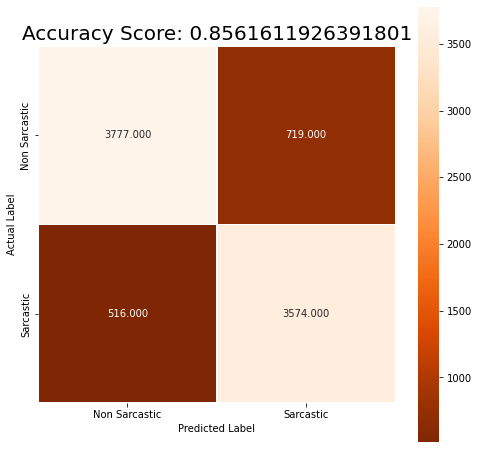

In [63]:
# Confusion Matrix

cm = confusion_matrix(y_test,base_predictions)
plt.figure(figsize=(8,8))
sns.heatmap(cm, annot = True, fmt = '.3f', linewidths = .5, square = True, cmap="Oranges_r" , xticklabels = ['Non Sarcastic', 'Sarcastic'], 
            yticklabels = ['Non Sarcastic', 'Sarcastic'])



plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(y_test,base_predictions))
plt.title(all_sample_title, size = 20)

**Observation**:-
1. 719 labels are wrongly classified in sarcastic headlines
2. 516 labels are wrongly classified in unsarcastic headlines.

In [64]:
# Classification Report
print(classification_report(y_test, base_predictions, target_names = ['Unsarcastic','Sarcastic']))

              precision    recall  f1-score   support

 Unsarcastic       0.88      0.84      0.86      4496
   Sarcastic       0.83      0.87      0.85      4090

    accuracy                           0.86      8586
   macro avg       0.86      0.86      0.86      8586
weighted avg       0.86      0.86      0.86      8586



**Observation**:- f1-score for unsarcatic is slightly better than sarcastic.

In [65]:
# Plotting History
def plot_history(history):
    # Storing Accuracies and Losses data of Training and Validation
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)
    # Features settings for plot
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.xlabel('Epoch ==>')
    plt.ylabel('Accuracy (%) ==>')
    plt.plot(x, acc, 'c', label='Training acc')
    plt.plot(x, val_acc, 'm', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.xlabel('Epoch ==>')
    plt.ylabel('Loss ==>')
    plt.plot(x, loss, 'c', label='Training loss')
    plt.plot(x, val_loss, 'm', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

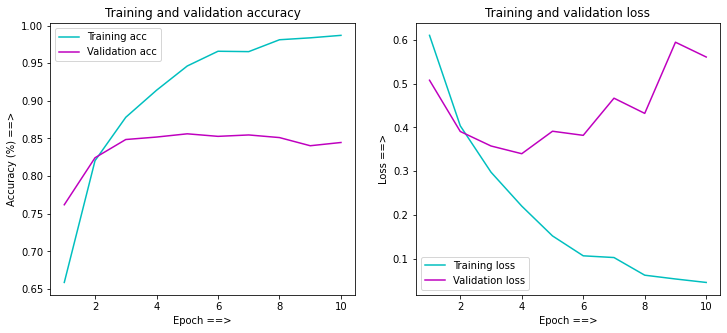

In [66]:
plot_history(base_history)

**Observation**:-
1. The above base model is strongly overfitting.
2. Training model has good learning rate but validation model has very high learning rate.

# Training a second model with extra dense layers, L2 penalties and different learning rate for optimizer for reducing the overfitting of model.

In [67]:
# Base Model Architechture
tf.keras.backend.clear_session() # Clear previous session
model = tf.keras.models.Sequential() # Model instantiation
model.add(tf.keras.layers.Embedding(num_words, embedding_dim, weights = [embedding_matrix], input_length=max_length)) #Input Layer
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True))) # Bidirectional LSTM Layer
model.add(tf.keras.layers.GlobalAveragePooling1D())
model.add(tf.keras.layers.Dense(64, activation='relu', kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.L2(l=0.001))) # kernel_regularizer=tf.keras.regularizers.L1L2(l1=0.01,l2=0.01)
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(32, activation='relu', kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.L2(l=0.001)))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(16, activation='relu', kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.L2(l=0.001)))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(1, activation='sigmoid')) # Output Layer

In [69]:
# Compiling the model
adam_opt = tf.keras.optimizers.Adam(lr=0.0001)
model.compile(loss='binary_crossentropy',optimizer=adam_opt, metrics=['accuracy'])
# Model Summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 50)           1302150   
                                                                 
 bidirectional (Bidirectiona  (None, 100, 256)         183296    
 l)                                                              
                                                                 
 global_average_pooling1d (G  (None, 256)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 64)                16448     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2

In [70]:
mc = tf.keras.callbacks.ModelCheckpoint('model_best.hdf5', monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
es = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", mode="max", patience=5)

In [71]:
history = model.fit(X_train, y_train, batch_size = batch_size, epochs = num_epochs, callbacks=[mc, es], validation_data=(X_test, y_test), verbose=1)

Epoch 1/15
79/79 [==============================] - ETA: 0s - loss: 0.9034 - accuracy: 0.5117
Epoch 00001: val_accuracy improved from -inf to 0.59772, saving model to model_best.hdf5
79/79 [==============================] - 93s 1s/step - loss: 0.9034 - accuracy: 0.5117 - val_loss: 0.8906 - val_accuracy: 0.5977
Epoch 2/15
79/79 [==============================] - ETA: 0s - loss: 0.8795 - accuracy: 0.5539
Epoch 00002: val_accuracy improved from 0.59772 to 0.63860, saving model to model_best.hdf5
79/79 [==============================] - 89s 1s/step - loss: 0.8795 - accuracy: 0.5539 - val_loss: 0.8625 - val_accuracy: 0.6386
Epoch 3/15
79/79 [==============================] - ETA: 0s - loss: 0.8299 - accuracy: 0.6157
Epoch 00003: val_accuracy improved from 0.63860 to 0.68693, saving model to model_best.hdf5
79/79 [==============================] - 88s 1s/step - loss: 0.8299 - accuracy: 0.6157 - val_loss: 0.7830 - val_accuracy: 0.6869
Epoch 4/15
79/79 [==============================] - ETA: 0

In [72]:
model_best = tf.keras.models.load_model('model_best.hdf5')

In [73]:
# Predicting for all of test dataset 
predictions = model_best.predict(X_test, batch_size=1024).round().astype(int)

Text(0.5, 1.0, 'Accuracy Score: 0.8435825762869789')

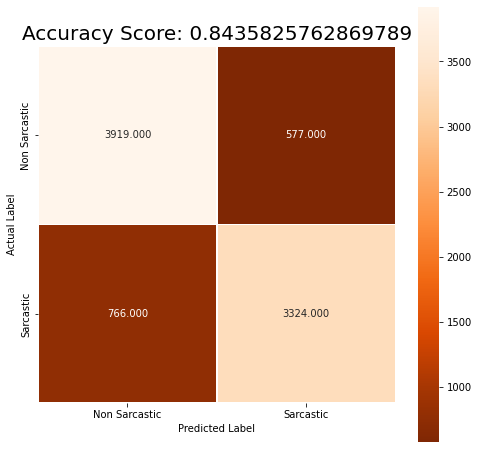

In [74]:
# Confusion Matrix

cm = confusion_matrix(y_test,predictions)
plt.figure(figsize=(8,8))
sns.heatmap(cm, annot = True, fmt = '.3f', linewidths = .5, square = True, cmap="Oranges_r", xticklabels = ['Non Sarcastic', 'Sarcastic'], 
            yticklabels = ['Non Sarcastic', 'Sarcastic'])
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(y_test,predictions))
plt.title(all_sample_title, size = 20)

Observation:-
1. 577 labels are wrongly classified in sarcastic headlines
2. 766 labels are wrongly classified in unsarcastic headlines.

In [75]:
# Classification Report
print(classification_report(y_test, predictions, target_names = ['Unsarcastic','Sarcastic']))

              precision    recall  f1-score   support

 Unsarcastic       0.84      0.87      0.85      4496
   Sarcastic       0.85      0.81      0.83      4090

    accuracy                           0.84      8586
   macro avg       0.84      0.84      0.84      8586
weighted avg       0.84      0.84      0.84      8586



Observation:- f1-score for unsarcatic is slightly better than sarcastic

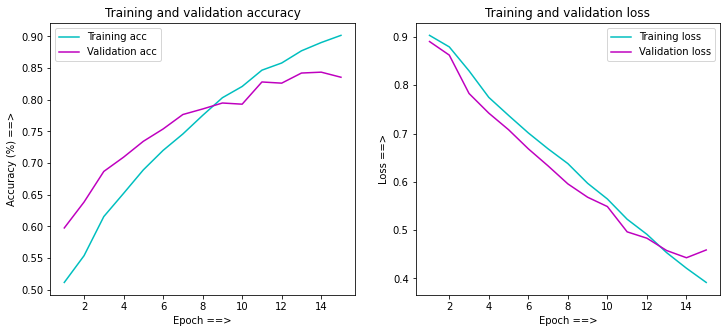

In [76]:
plot_history(history)

### **Observation**:-
1. This model is only little overfitting. Compared to the previous base model, this one has improved drastically.
2. Training and Validation has good learning rate.
3. This model is better amongst the two.

### **Conclusion**:-
1. The first model is highly overfitting whereas second model is only little overfitting.
2. f1-score is only reducing by little in second model.
3. Difference between wrongly classified labels has slightly increased in the second model.
4. To increase f1-score or accuracy further without overfiitting the model more data is necessary.